## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II
### Amanda Valukas Breviglieri Joioso - 4818232

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 70% das observações e
teste com 30%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/amandajoioso/AmandaValukasBreviglieriJoioso_SME0823/refs/heads/main/sneeze2.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,78,0,0,0,32.0,81.085959
1,8,0,0,0,41.0,53.888183
2,34,0,0,1,39.0,92.455084
3,7,0,0,0,56.0,41.246594
4,8,0,0,0,36.0,91.036921
...,...,...,...,...,...,...
1395,10,1,0,0,53.0,57.794915
1396,11,1,0,0,58.0,59.585500
1397,9,0,0,0,36.0,29.955485
1398,18,1,1,0,47.0,63.221483


In [2]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


**Comportamento da Variável Resposta (nsneeze):**

* Assimetria e Dispersão: A média de espirros é de aproximadamente 23.4, enquanto a mediana (50%) é 12.0. O fato da média ser quase o dobro da mediana indica uma distribuição fortemente assimétrica à direita (cauda longa).

* Variância Elevada: O desvio padrão (49.20) é muito superior à média. Como a variância é o quadrado do desvio padrão (≈2420), temos que Var(Y)≫E[Y]. Isso sugere fortes indícios de superdispersão nos dados, o que pode impactar a adequação de um modelo de Poisson simples.

* Outliers: O valor máximo de 940 espirros é extremamente alto comparado ao terceiro quartil (22), indicando a presença de valores extremos

In [3]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,23.425000,0.259286,0.202143,0.192857,40.550714,58.687196
std,49.201546,0.438399,0.401742,0.394683,13.589310,29.748564
min,0.000000,0.000000,0.000000,0.000000,18.000000,6.576282
25%,6.000000,0.000000,0.000000,0.000000,30.750000,37.643987
50%,12.000000,0.000000,0.000000,0.000000,40.000000,53.852482
75%,22.000000,1.000000,0.000000,0.000000,49.000000,73.818962
max,940.000000,1.000000,1.000000,1.000000,80.000000,202.922690


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nsneeze   1400 non-null   int64  
 1   alcohol   1400 non-null   int64  
 2   antihist  1400 non-null   int64  
 3   smoker    1400 non-null   int64  
 4   age       1400 non-null   float64
 5   pollen    1400 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 65.8 KB


**Relação com Covariáveis (Correlação Linear):**

* pollen (0.60): Apresenta a correlação positiva mais forte com o número de espirros. Isso condiz com o esperado clinicamente: quanto maior a concentração de pólen, maior a frequência de espirros.

* smoker (0.17): Há uma correlação positiva fraca, sugerindo que fumantes tendem a espirrar ligeiramente mais do que não fumantes.

* antihist (-0.11): Apresenta correlação negativa, indicando que o uso de anti-histamínicos está associado a uma redução no número de espirros, o que comprova a eficácia esperada do medicamento.

* age (-0.08) e alcohol (0.07): Apresentam correlações lineares muito próximas de zero, sugerindo que, isoladamente e de forma linear, estas variáveis explicam pouco a variação no número de espirros.

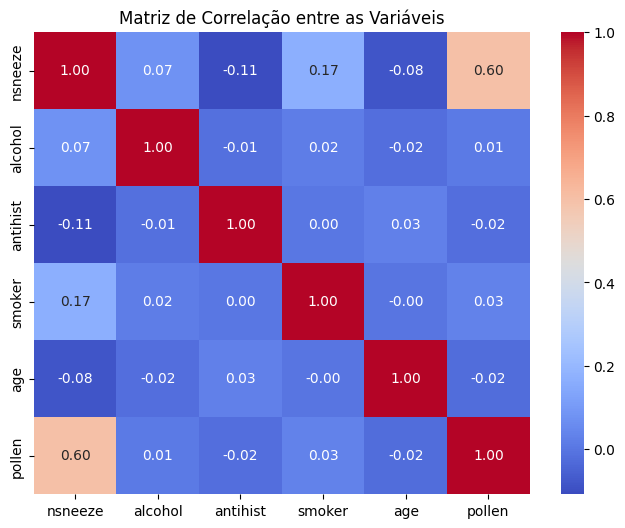

In [7]:
correlacao = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

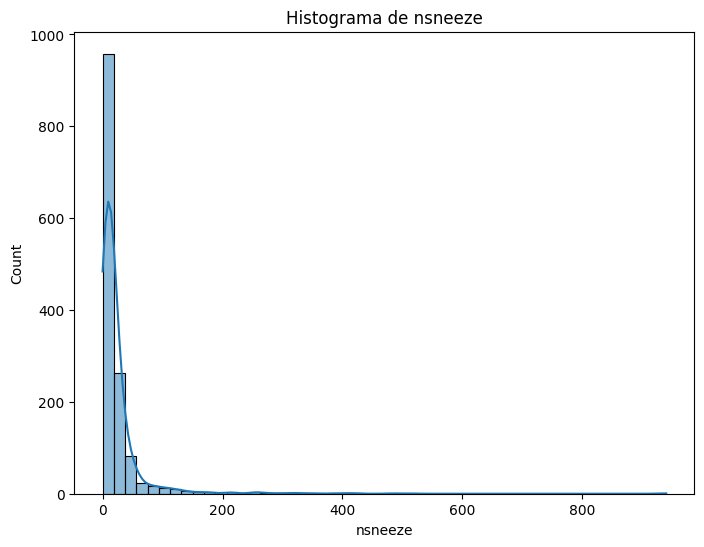

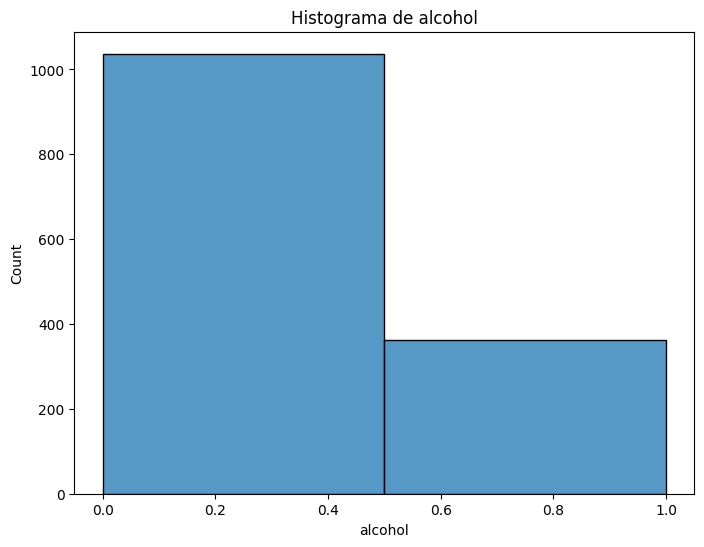

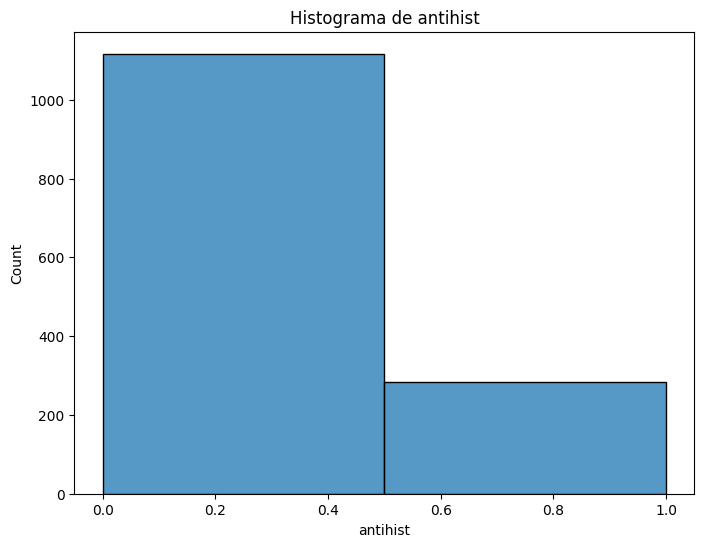

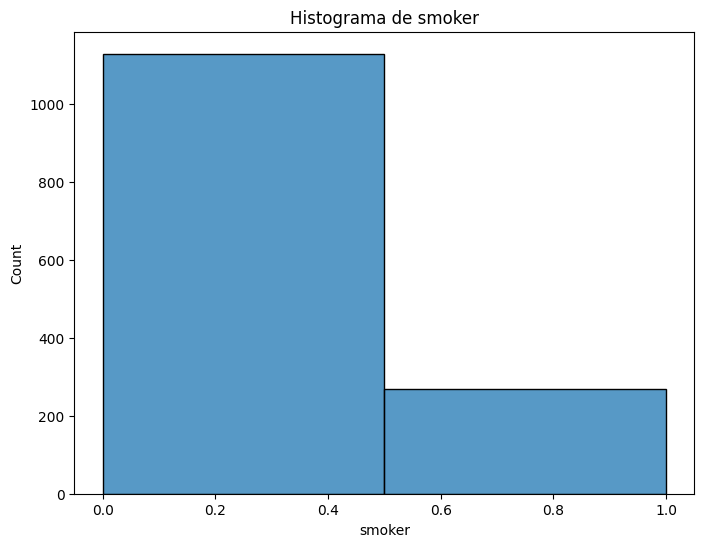

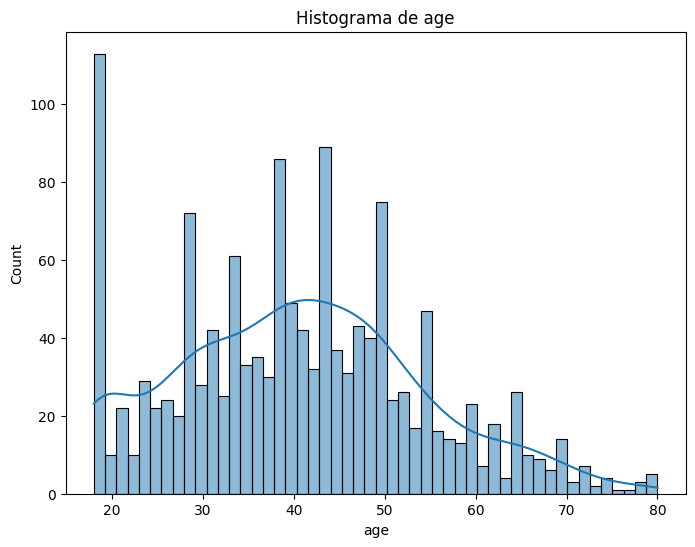

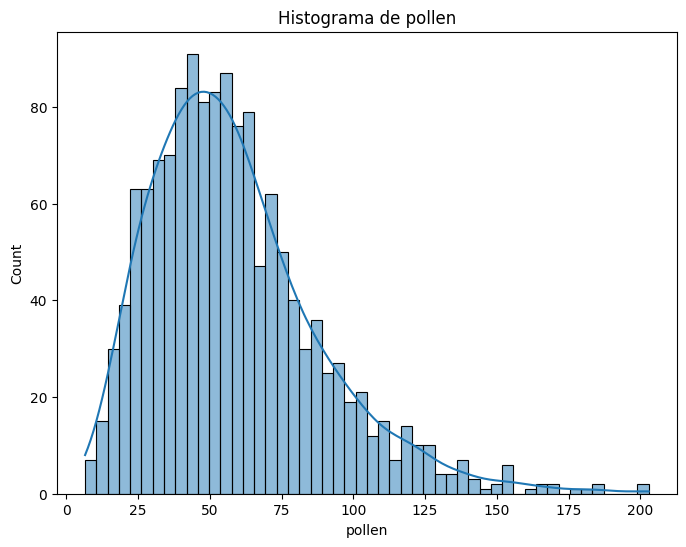

In [11]:
# plotando histograma pra cada coluna

binary_columns = ['alcohol', 'antihist', 'smoker']

for coluna in df.columns:
    plt.figure(figsize=(8, 6))

    if coluna in binary_columns:
      sns.histplot(data=df, x=coluna, bins=2)
    else:
      sns.histplot(data=df, x=coluna, kde=True, bins=50)
    plt.title(f'Histograma de {coluna}')
    plt.show()

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [5]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8511.6
Date:                Mon, 01 Dec 2025   Deviance:                       11077.
Time:                        02:21:31   Pearson chi2:                 1.15e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5028      0.021  

In [8]:
print("Coeficientes exponenciados (Razão de Taxas):")
print(np.exp(ajuste_pois.params))

Coeficientes exponenciados (Razão de Taxas):
Intercept           4.494407
C(alcohol)[T.1]     1.379987
C(antihist)[T.1]    0.555752
C(smoker)[T.1]      1.983595
age                 0.987896
pollen              1.026346
dtype: float64


A equação do modelo de regressão de Poisson ajustado, que relaciona o logaritmo do número esperado de espirros com as variáveis explicativas, é dada por:

$$
\ln(\widehat{\mu}) = 1.5028 + 0.3221(\text{alcohol}) - 0.5874(\text{antihist}) + 0.6849(\text{smoker}) - 0.0122(\text{age}) + 0.0260(\text{pollen})
$$

Onde μ​ representa o número médio esperado de espirros.

Significância Estatística: Todas as variáveis preditoras apresentaram p-valor < 0.001, indicando que todas são estatisticamente significativas para explicar a quantidade de espirros a um nível de confiança de 95%.

Interpretação dos Efeitos ($e^{\hat{\beta}}$):

* Intercepto ($e^{\hat{\beta}_0}$​ ≈ 4.49): Representa a taxa basal teórica de espirros quando todas as variáveis são zero (não fumante, não bebe, sem remédio, idade 0 e pólen 0).

* Álcool (alcohol = 1.38): O consumo de álcool aumenta a taxa esperada de espirros em um fator de 1.38. Ou seja, espera-se um aumento de 38% no número de espirros para quem consumiu álcool, mantendo as demais variáveis constantes.

* Anti-histamínico (antihist = 0.56): O uso de anti-histamínico atua como fator de proteção. A taxa de espirros para quem usa o medicamento é 0.56 vezes a taxa de quem não usa. Isso representa uma redução de aproximadamente 44% (1−0.56) na quantidade esperada de espirros.

* Tabagismo (smoker = 1.98): Ser fumante quase dobra o número esperado de espirros (fator de 1.98), representando um aumento de 98% em relação aos não fumantes.

* Idade (age = 0.99): A cada ano adicional de idade, a taxa de espirros é multiplicada por 0.99. Isso indica uma leve redução de 1,2% no número de espirros para cada ano a mais de vida.

* Pólen (pollen = 1.03): A concentração de pólen tem efeito positivo. Para cada unidade de aumento no índice de pólen, espera-se um aumento de 2,6% no número médio de espirros.


**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [9]:
# Método 1: Razão entre o Qui-quadrado de Pearson e os graus de liberdade residuais
phi_estimado = ajuste_pois.pearson_chi2 / ajuste_pois.df_resid
print(f"Dispersão estimada (Phi): {phi_estimado:.4f}")

if phi_estimado > 1.5: # Um limiar comum, mas subjetivo. O ideal é ser próximo de 1.
    print("Indício de superdispersão detectado pelo método da razão.")
else:
    print("Dispersão parece adequada pelo método da razão.")

print("-" * 30)

Dispersão estimada (Phi): 8.2422
Indício de superdispersão detectado pelo método da razão.
------------------------------


In [10]:
# Método 2: Teste de Cameron & Trivedi (Regressão Auxiliar)
# H0: Média = Variância (Equidispersão) vs H1: Variância = Média + alpha * Média^2
# Regressão de ((y - mu)^2 - y) / mu  sobre mu (sem intercepto)

y = df['nsneeze']
mu = ajuste_pois.fittedvalues
aux_y = ((y - mu)**2 - y) / mu

# Ajuste OLS auxiliar sem intercepto
modelo_auxiliar = sm.OLS(aux_y, mu).fit()

print(modelo_auxiliar.summary())
print(f"\nCoeficiente Alpha estimado: {modelo_auxiliar.params[0]:.4f}")
print(f"P-valor do teste t para Alpha: {modelo_auxiliar.pvalues[0]:.4e}")

if modelo_auxiliar.pvalues[0] < 0.05 and modelo_auxiliar.params[0] > 0:
    print("Superdispersão estatisticamente significativa confirmada.")
else:
    print("Não há evidências estatísticas suficientes de superdispersão.")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.231
Model:                            OLS   Adj. R-squared (uncentered):              0.230
Method:                 Least Squares   F-statistic:                              419.6
Date:                Mon, 01 Dec 2025   Prob (F-statistic):                    9.28e-82
Time:                        02:21:43   Log-Likelihood:                         -6676.5
No. Observations:                1400   AIC:                                  1.336e+04
Df Residuals:                    1399   BIC:                                  1.336e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/tmp/ipython-input-3232513403.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nCoeficiente Alpha estimado: {modelo_auxiliar.params[0]:.4f}")
/tmp/ipython-input-3232513403.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"P-valor do teste t para Alpha: {modelo_auxiliar.pvalues[0]:.4e}")
/tmp/ipython-input-3232513403.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if modelo_auxiliar.pvalues[0] < 0.05 and 

In [11]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

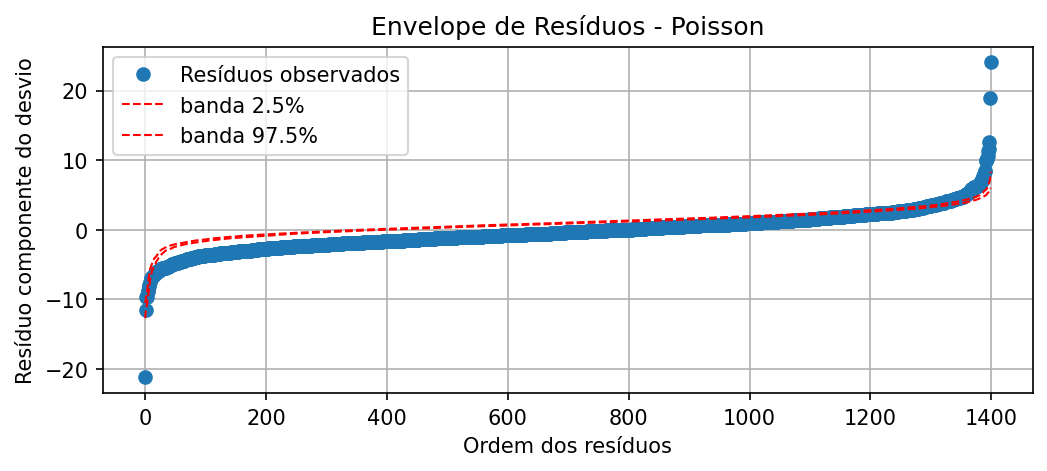

In [12]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

A superdispersão ocorre quando a variância dos dados observados é superior à variância esperada pelo modelo de Poisson (onde assume-se que Média = Variância). Para verificar este fenômeno, foram utilizados dois métodos quantitativos e um diagnóstico gráfico.

Método 1: Razão Desvio / Graus de Liberdade (ϕ)
* O valor estimado para o parâmetro de dispersão foi ϕ≈8.24.
* Como este valor é muito superior a 1 (o valor esperado sob a hipótese nula de equidispersão), há um forte indício de superdispersão.

Método 2: Teste de Cameron & Trivedi

* Este teste verifica a hipótese nula H0​:Var(Y)=μ contra a alternativa H1​:Var(Y)=μ+α⋅μ2.
* O coeficiente α estimado foi 0.3302, com um p-valor extremamente baixo (P<0.001).
* A significância estatística do parâmetro α confirma a presença de superdispersão.

Diagnóstico Gráfico (Envelope de Resíduos):
* O gráfico de envelope simulado mostra que uma grande parte dos resíduos observados cai fora das bandas de confiança de 95%, especialmente nas caudas.
* Isso indica que o modelo de Poisson não consegue capturar adequadamente a variabilidade dos dados, reforçando a conclusão dos testes numéricos.

Diante das evidências numéricas (Phi elevado e Alpha significativo) e visuais (resíduos fora do envelope), conclui-se que o modelo de Poisson não é adequado para estes dados. A superdispersão observada sugere a necessidade de um modelo alternativo que flexibilize a relação média-variância, como o modelo Binomial Negativo.

**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [18]:
modelo_mle = smf.negativebinomial("nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen", data=df).fit()

print("=== Estimativa de Alpha via MLE ===")
print(f"Alpha estimado pelo modelo: {modelo_mle.params['alpha']:.4f}")


Optimization terminated successfully.
         Current function value: 3.495871
         Iterations: 15
         Function evaluations: 23
         Gradient evaluations: 23
=== Estimativa de Alpha via MLE ===
Alpha estimado pelo modelo: 0.3119


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.3


modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1400
Model:                            GLM   Df Residuals:                     1394
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4894.5
Date:                Mon, 01 Dec 2025   Deviance:                       1569.9
Time:                        02:41:15   Pearson chi2:                 1.41e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9451
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5238      0.064  

In [21]:
print(f"POISSON - Deviance: {ajuste_pois.deviance:.2f} | AIC: {ajuste_pois.aic:.2f}")
print(f"BIN. NEG - Deviance: {ajuste_nb.deviance:.2f} | AIC: {ajuste_nb.aic:.2f}")


POISSON - Deviance: 11077.48 | AIC: 17035.13
BIN. NEG - Deviance: 1569.93 | AIC: 9801.10


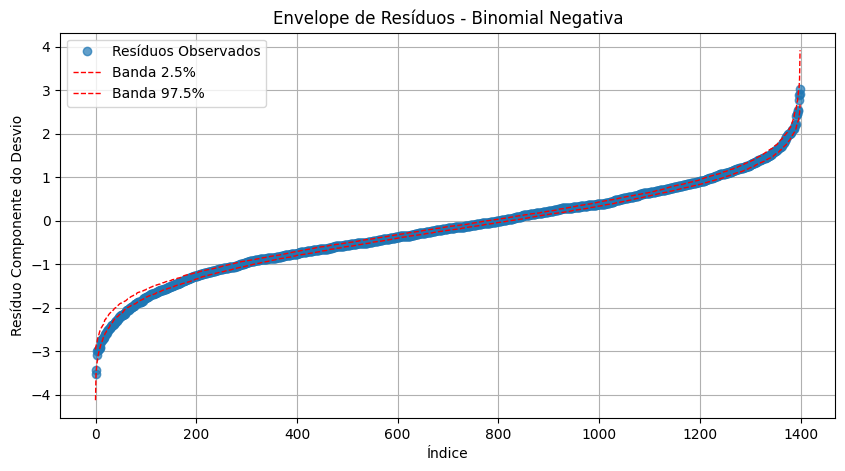

In [22]:
# Gráfico de Envelope para Binomial Negativa
# Reutilizando a lógica da função de envelope, mas adaptada para a família NB

def envelope_negbin(fitted_model, title, alpha_value):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)
    X = fitted_model.model.exog

    sim_resid = []
    for _ in range(100):
        mu = fitted_model.fittedvalues
        # Var = mu + alpha*mu^2.  p = n/(n+mu), n = 1/alpha
        n_param = 1 / alpha_value
        p_param = n_param / (n_param + mu)

        y_sim = np.random.negative_binomial(n=n_param, p=p_param)

        # Reajustando o modelo com os dados simulados
        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha_value)
        ).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.figure(figsize=(10, 5))
    plt.plot(sorted_resid, 'o', label="Resíduos Observados", alpha=0.7)
    plt.plot(lower, 'r--', linewidth=1, label="Banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="Banda 97.5%")
    plt.title(title)
    plt.xlabel("Índice")
    plt.ylabel("Resíduo Componente do Desvio")
    plt.legend()
    plt.grid(True)
    plt.show()

# Gerando o gráfico
envelope_negbin(ajuste_nb, "Envelope de Resíduos - Binomial Negativa", alpha_fixado)

Dado o diagnóstico de superdispersão no modelo de Poisson, ajustamos um modelo Binomial Negativo com a mesma estrutura de preditores, fixando o parâmetro de dispersão α=0.2.

**Comparação de Ajuste (Métricas):**

* Deviance (Desvio):

  * Modelo Poisson: 11077.48

  * Modelo Binomial Negativo: 1569.93

  * A redução drástica no desvio (de ~11 mil para menos de 2 mil) indica que o modelo Binomial Negativo se ajusta muito melhor aos dados, capturando a variabilidade excessiva que o Poisson não conseguiu modelar.

* AIC (Critério de Informação de Akaike):

  * Modelo Poisson: 17035.13

  * Modelo Binomial Negativo: 9801.10

  * O modelo Binomial Negativo apresenta um AIC significativamente menor. Como o AIC penaliza a complexidade do modelo e busca o melhor ajuste, um valor menor confirma que o modelo Binomial Negativo é preferível.

**Envelope de Resíduos:** A grande maioria dos resíduos observados encontra-se dentro das bandas de confiança. Isso contrasta com o modelo de Poisson, onde os resíduos nas caudas fugiam sistematicamente do envelope.

Sendo assim, o modelo Binomial Negativo é o mais adequado para descrever o número de espirros nesta amostra. Esta conclusão é sustentada tanto pelas métricas quantitativas (menor AIC e Deviance) quanto pela análise gráfica dos resíduos, que demonstram que a distribuição Binomial Negativa acomoda adequadamente a superdispersão presente nos dados.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [23]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


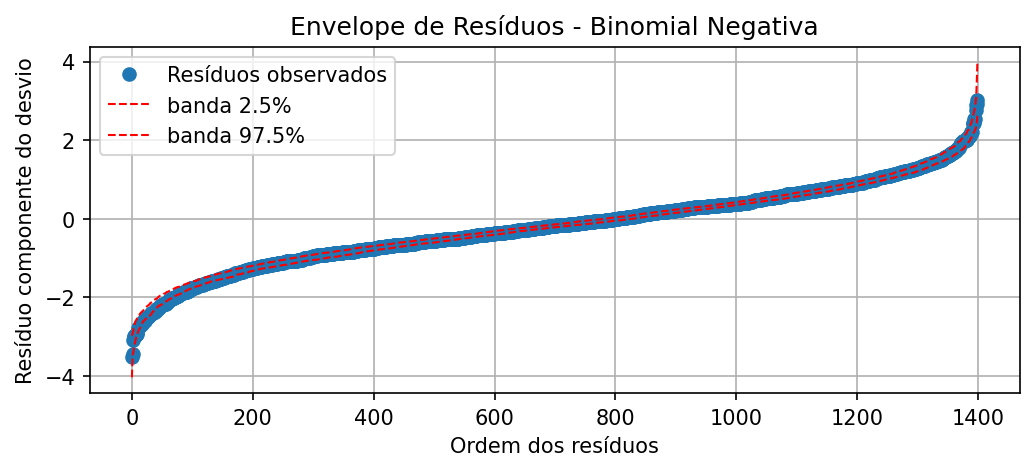

In [24]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [25]:
# Extraindo coeficientes e intervalos de confiança do modelo Binomial Negativo (ajuste_nb)
conf_int = ajuste_nb.conf_int()
conf_int['Coeficiente'] = ajuste_nb.params
conf_int.columns = ['IC 2.5%', 'IC 97.5%', 'Coeficiente']

# Calculando a Razão de Taxas (Rate Ratio) = exp(beta)
efeitos = np.exp(conf_int)
efeitos.columns = ['IC 2.5% (RR)', 'IC 97.5% (RR)', 'Razão de Taxas (RR)']

# Filtrando apenas as variáveis de interesse (Alcohol e Antihist)
interesse = efeitos.loc[['C(alcohol)[T.1]', 'C(antihist)[T.1]']]

print("Estimativas de Efeito (Razão de Taxas):")
print(interesse)

Estimativas de Efeito (Razão de Taxas):
                  IC 2.5% (RR)  IC 97.5% (RR)  Razão de Taxas (RR)
C(alcohol)[T.1]       1.319360       1.526855             1.419321
C(antihist)[T.1]      0.500076       0.592721             0.544431


In [26]:
rr_alcohol = interesse.loc['C(alcohol)[T.1]', 'Razão de Taxas (RR)']
rr_antihist = interesse.loc['C(antihist)[T.1]', 'Razão de Taxas (RR)']

perc_alcohol = (rr_alcohol - 1) * 100
perc_antihist = (1 - rr_antihist) * 100

print(f"\nINTERPRETAÇÃO:")
print(f"Álcool: Aumenta a média de espirros em {perc_alcohol:.2f}%")
print(f"Anti-histamínico: Reduz a média de espirros em {perc_antihist:.2f}%")


INTERPRETAÇÃO:
Álcool: Aumenta a média de espirros em 41.93%
Anti-histamínico: Reduz a média de espirros em 45.56%


**Consumo de Álcool (alcohol):** O consumo de bebidas alcoólicas está associado a um aumento de 41,9% no número médio esperado de espirros, mantendo-se constantes as demais variáveis (idade, tabagismo e pólen).

**Uso de Anti-histamínico (antihist):** Estima-se que o uso da medicação reduz o número médio de espirros em 45,6% em comparação aos indivíduos que não a utilizaram, mantendo as demais condições constantes.

**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separando dos dados (80% Treino, 20% Teste)
treino, teste = train_test_split(df, test_size=0.20, random_state=42)

# Ajustando os Modelos na base de TREINO
# Modelo Poisson
modelo_pois_treino = smf.glm(
    "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data=treino,
    family=sm.families.Poisson()
).fit()

# Modelo Binomial Negativo (Usando o alpha=0.3)
modelo_nb_treino = smf.glm(
    "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen",
    data=treino,
    family=sm.families.NegativeBinomial(alpha=0.3)
).fit()


In [31]:
# Predições na base de TESTE
# O modelo prevê a média (lambda/mu) para cada observação do teste
pred_pois = modelo_pois_treino.predict(teste)
pred_nb = modelo_nb_treino.predict(teste)

# Valores observados reais
y_real = teste['nsneeze']

# Calculando as Métricas de Erro
# Poisson
eqm_pois = mean_squared_error(y_real, pred_pois)
eam_pois = mean_absolute_error(y_real, pred_pois)

# Binomial Negativa
eqm_nb = mean_squared_error(y_real, pred_nb)
eam_nb = mean_absolute_error(y_real, pred_nb)

# Resultados
print(f"=== Desempenho Preditivo (Base de Teste) ===")
print(f"POISSON       -> EQM: {eqm_pois:.4f} | EAM: {eam_pois:.4f}")
print(f"BIN. NEGATIVO -> EQM: {eqm_nb:.4f} | EAM: {eam_nb:.4f}")

=== Desempenho Preditivo (Base de Teste) ===
POISSON       -> EQM: 614.2283 | EAM: 11.7818
BIN. NEGATIVO -> EQM: 612.8212 | EAM: 11.6452


**Melhor Desempenho Preditivo:** O modelo Binomial Negativo apresentou o melhor desempenho preditivo fora da amostra, obtendo os menores valores tanto para o EQM quanto para o EAM. Isso indica que, além de se ajustar melhor aos dados de treino (como visto pelo AIC e Deviance), ele também generaliza melhor para novos dados.

**Consistência com Critérios de Ajuste:** As conclusões baseadas nas métricas preditivas (EQM/EAM) coincidem com as conclusões dos critérios de ajuste (AIC/Deviance). Em ambas as análises, o modelo Binomial Negativo se mostrou superior. Embora a diferença numérica nos erros de previsão pontual (média) seja pequena, ela é consistente a favor do modelo que trata corretamente a superdispersão.

**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [32]:
# Definindo os níveis de pólen (Baixa = 1º Quartil, Alta = 3º Quartil)
# Usando quartis como referência para "baixa" e "alta" concentração
pollen_baixa = df['pollen'].quantile(0.25)
pollen_alta = df['pollen'].quantile(0.75)

print(f"Concentração de Pólen - Baixa (Q1): {pollen_baixa:.2f}")
print(f"Concentração de Pólen - Alta (Q3): {pollen_alta:.2f}")

Concentração de Pólen - Baixa (Q1): 37.64
Concentração de Pólen - Alta (Q3): 73.82


In [33]:
# criando o df com os perfis
# Indivíduo A: não bebe, usa anti-hist., não fuma, 30 anos, pólen baixo
# Indivíduo B: bebe, não usa anti-hist., fuma, 50 anos, pólen alto
perfis = pd.DataFrame({
    'alcohol': [0, 1],
    'antihist': [1, 0],
    'smoker': [0, 1],
    'age': [30, 50],
    'pollen': [pollen_baixa, pollen_alta]
}, index=['Indivíduo A', 'Indivíduo B'])

In [34]:
# Realizando a previsão
previsoes = ajuste_nb.predict(perfis)

print("\n=== PREVISÃO DO NÚMERO ESPERADO DE ESPIRROS ===")
print(perfis)
print("-" * 60)
for individuo, espirros in previsoes.items():
    print(f"{individuo}: Espera-se {espirros:.2f} espirros.")


=== PREVISÃO DO NÚMERO ESPERADO DE ESPIRROS ===
             alcohol  antihist  smoker  age     pollen
Indivíduo A        0         1       0   30  37.643987
Indivíduo B        1         0       1   50  73.818962
------------------------------------------------------------
Indivíduo A: Espera-se 4.63 espirros.
Indivíduo B: Espera-se 45.16 espirros.


Para as concentrações de pólen, foram adotados os seguintes valores de referência baseados na distribuição dos dados:

* Baixa concentração: 1º Quartil (Q1≈37.64)

* Alta concentração: 3º Quartil (Q3≈73.82)

Com isso, foram obtidos os seguintes resultados:

**Indivíduo A: Espera-se 4.63 espirros.**

**Indivíduo B: Espera-se 45.16 espirros.**

O Indivíduo B apresenta um número esperado de espirros quase 10 vezes maior que o Indivíduo A. Isso reflete o efeito cumulativo das covariáveis analisadas anteriormente: o Indivíduo B está exposto a todos os fatores que aumentam a contagem (álcool, tabagismo e alta concentração de pólen) e não utiliza o fator de proteção (anti-histamínico), resultando em um quadro clínico significativamente mais severo.